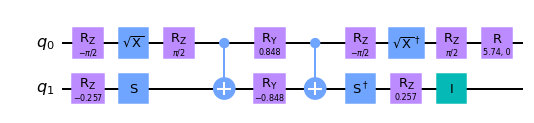

In [1]:
from qiskit.circuit.random import random_circuit

circuit = random_circuit(2, 2, seed=0).decompose(reps=1)
display(circuit.draw("mpl"))

In [2]:
from qiskit.primitives import Estimator

estimator = Estimator()

In [3]:
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector

x=ParameterVector("x",2)

observable = SparsePauliOp(["XZ", "ZX"], [x[0], x[1]])
print(f">>> Observable: {observable.paulis}")

>>> Observable: ['XZ', 'ZX']


In [4]:
test = observable.assign_parameters({x[0]:1.0,x[1]:0.5})
job = estimator.run(circuit, test)
job.result()

EstimatorResult(values=array([0.50006466]), metadata=[{}])